# Laboratory exercise 4
https://github.com/koroteevmv/ML_course/blob/main/ML3.1%20polynomial%20features/README.md

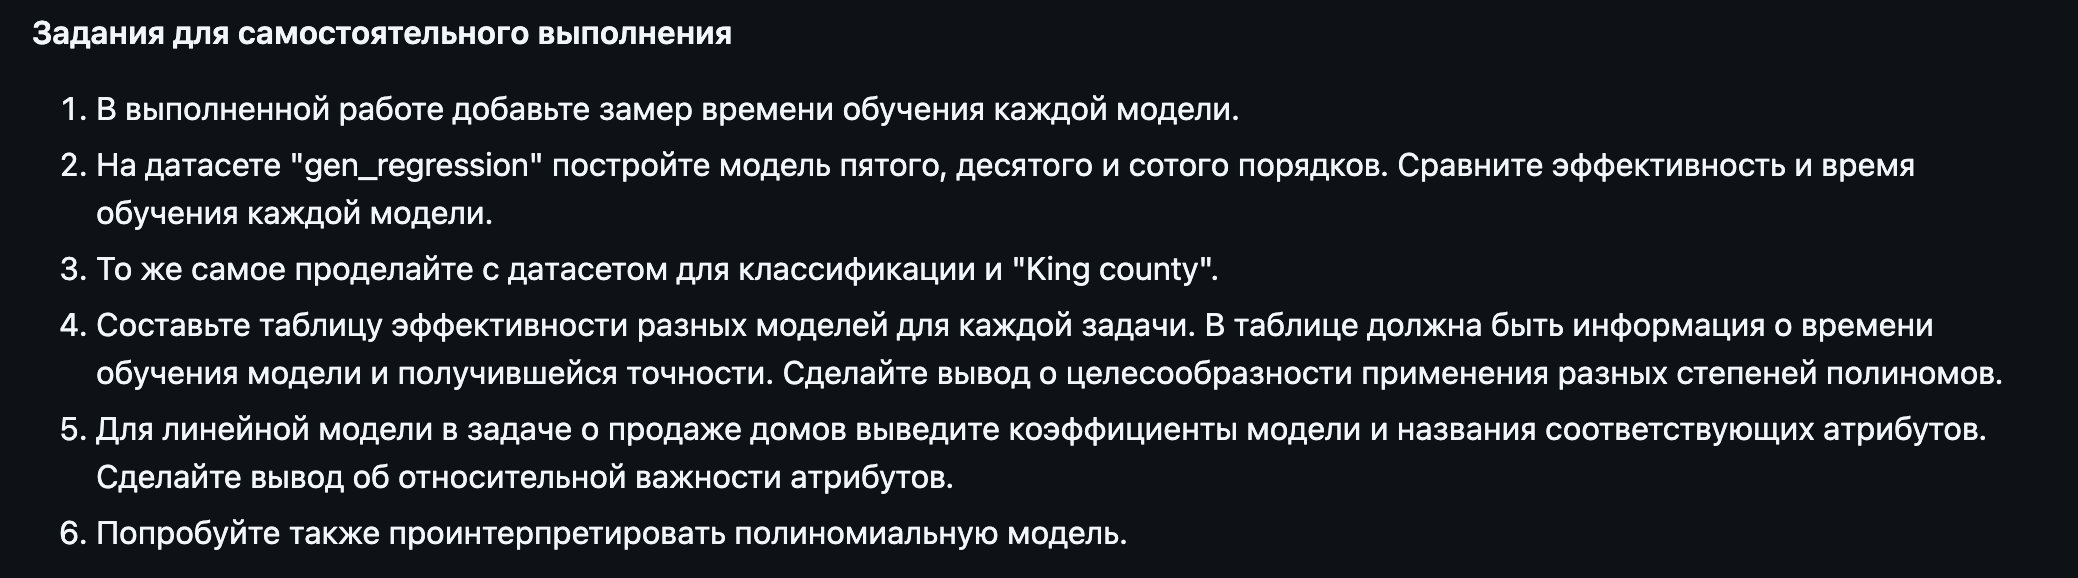

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score 
import time

In [42]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.1%20polynomial%20features/data/gen_regression.csv")

In [43]:
print("Первые 5 строк датасета gen_regression:")
data.head()

Первые 5 строк датасета gen_regression:


,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [44]:
X = data.x
y = data.y

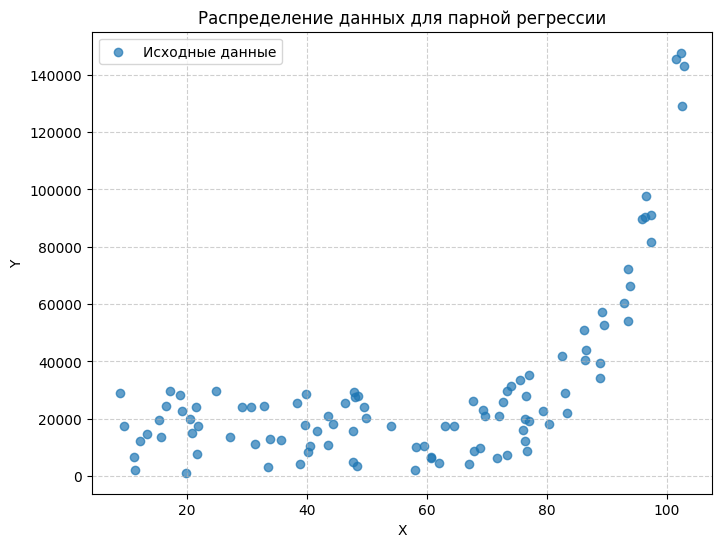

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Исходные данные')
plt.title('Распределение данных для парной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


Время обучения линейной регрессии: 0.0009 сек.


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


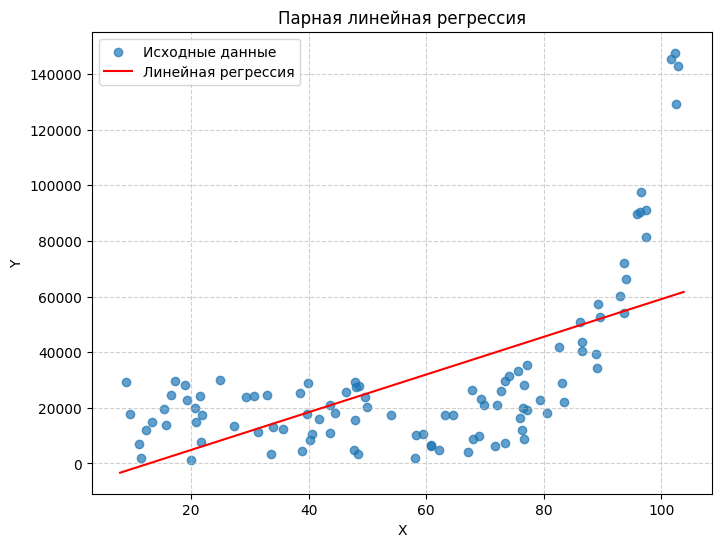

In [46]:
X_df = pd.DataFrame(X)

# Замеряем время обучения
start_time = time.time()
linear_reg_model = LinearRegression().fit(X_df, y)
end_time = time.time()
linear_reg_time = end_time - start_time
print(f"\nВремя обучения линейной регрессии: {linear_reg_time:.4f} сек.")

xx = np.arange(X_df.x.min(axis=0) - 1, X_df.x.max(axis=0) + 1, 0.1)
yy = linear_reg_model.predict(pd.DataFrame(xx))

plt.figure(figsize=(8, 6))
plt.scatter(X_df.x, y, alpha=0.7, label='Исходные данные')
plt.plot(xx, yy, c='r', label='Линейная регрессия')
plt.title('Парная линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [47]:
linear_reg_score = linear_reg_model.score(X_df, y)
print(f"Коэффициент детерминации (R^2) линейной регрессии: {linear_reg_score:.4f}")

print("Вывод: Коэффициент детерминации довольно низкий, что подтверждает, что линейная модель плохо описывает нелинейные данные.")

Коэффициент детерминации (R^2) линейной регрессии: 0.3747
Вывод: Коэффициент детерминации довольно низкий, что подтверждает, что линейная модель плохо описывает нелинейные данные.



Форма матрицы признаков после преобразования (степень 2): (100, 3)
Первые 5 строк X_2d:
[[1.00000000e+00 9.65977805e+01 9.33113119e+03]
 [1.00000000e+00 4.80028921e+01 2.30427765e+03]
 [1.00000000e+00 4.79397558e+01 2.29822018e+03]
 [1.00000000e+00 4.78090258e+01 2.28570295e+03]
 [1.00000000e+00 6.97844271e+01 4.86986627e+03]]
Время обучения полиномиальной регрессии 2-го порядка: 0.0005 сек.


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


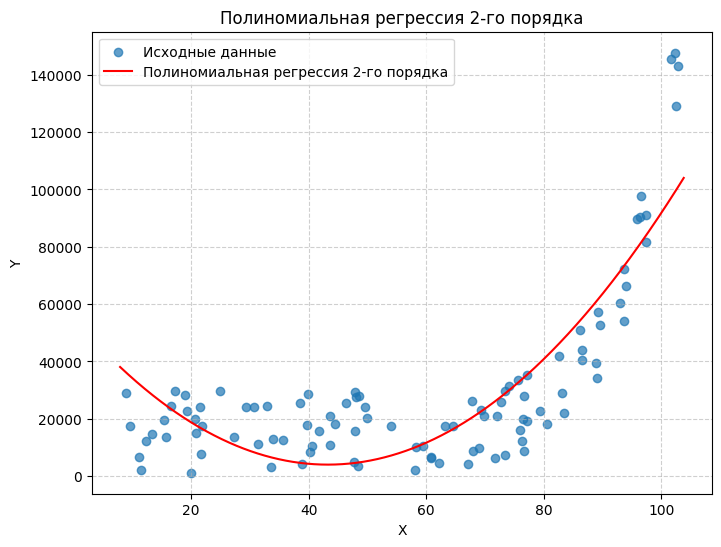

In [48]:
transformation_2d = PolynomialFeatures(degree=2)


X_2d = transformation_2d.fit_transform(X_df) 
print(f"\nФорма матрицы признаков после преобразования (степень 2): {X_2d.shape}")
print("Первые 5 строк X_2d:")
print(X_2d[:5])

start_time = time.time()
poly_2d_model = LinearRegression().fit(X_2d, y)
end_time = time.time()
poly_2d_time = end_time - start_time
print(f"Время обучения полиномиальной регрессии 2-го порядка: {poly_2d_time:.4f} сек.")


xx_2d_transformed = transformation_2d.transform(pd.DataFrame(xx))
yy_2d = poly_2d_model.predict(xx_2d_transformed)

plt.figure(figsize=(8, 6))
plt.scatter(X_df.x, y, alpha=0.7, label='Исходные данные')
plt.plot(xx, yy_2d, c='r', label='Полиномиальная регрессия 2-го порядка')
plt.title('Полиномиальная регрессия 2-го порядка')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [49]:
poly_2d_score = poly_2d_model.score(X_2d, y)
print(f"Коэффициент детерминации (R^2) полиномиальной регрессии 2-го порядка: {poly_2d_score:.4f}")

print("\nВывод: Полиномиальная модель 2-го порядка значительно лучше описывает данные (R^2 значительно выше), и ее кривая на графике гораздо точнее повторяет форму распределения точек по сравнению с линейной моделью.")

Коэффициент детерминации (R^2) полиномиальной регрессии 2-го порядка: 0.7360

Вывод: Полиномиальная модель 2-го порядка значительно лучше описывает данные (R^2 значительно выше), и ее кривая на графике гораздо точнее повторяет форму распределения точек по сравнению с линейной моделью.


In [50]:
data_class = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
print("\nПервые 5 строк датасета gen_classification:")
data_class.head()


Первые 5 строк датасета gen_classification:


,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [51]:
y_class = data_class.y
X_class = data_class.drop(["y"], axis=1)
print(f"\nФорма X_class: {X_class.shape}, Форма y_class: {y_class.shape}")


Форма X_class: (250, 2), Форма y_class: (250,)


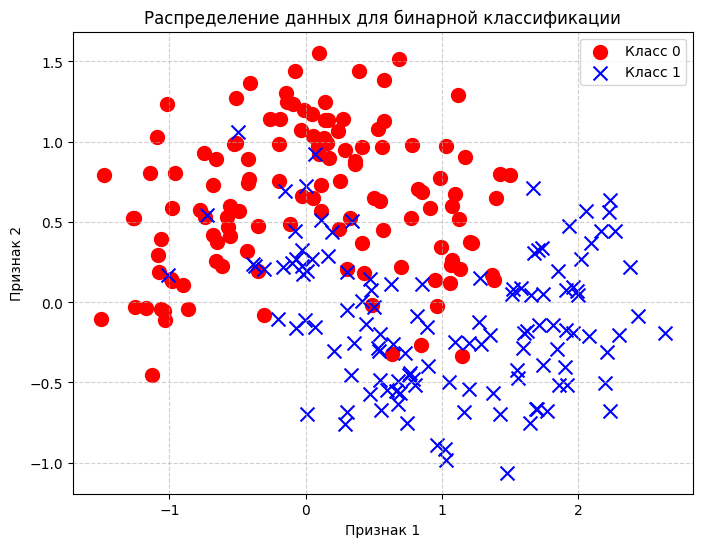

На графике видно, что данные линейно неразделимы (классы образуют круги/концентрические области).


In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Распределение данных для бинарной классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("На графике видно, что данные линейно неразделимы (классы образуют круги/концентрические области).")


Время обучения линейной классификации: 0.0036 сек.


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


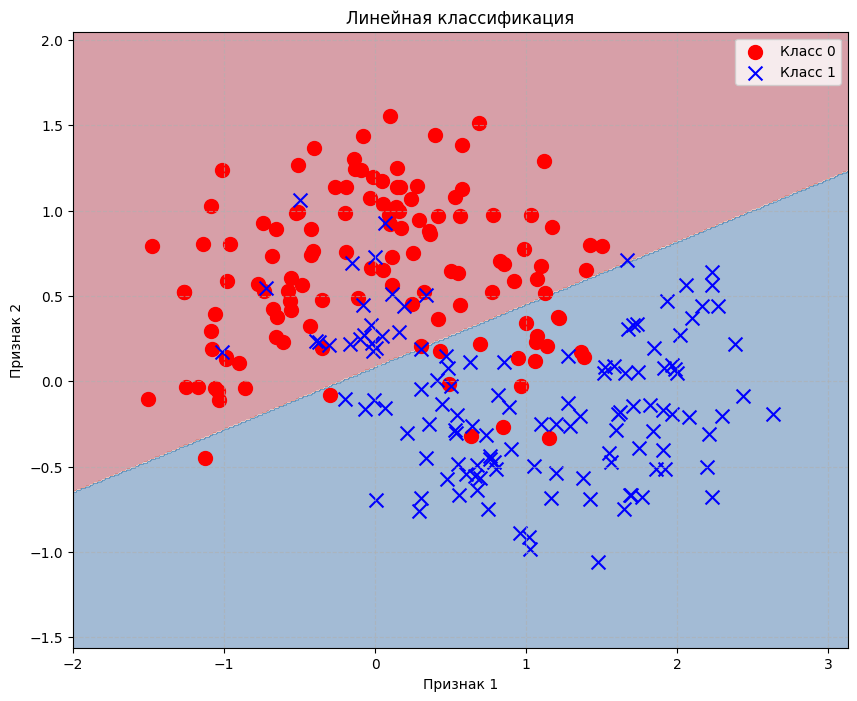

In [53]:
start_time = time.time()
logistic_class_model = LogisticRegression().fit(X_class, y_class)
end_time = time.time()
logistic_class_time = end_time - start_time
print(f"\nВремя обучения линейной классификации: {logistic_class_time:.4f} сек.")

x_min_c, x_max_c = X_class.iloc[:, 0].min() - 0.5, X_class.iloc[:, 0].max() + 0.5
y_min_c, y_max_c = X_class.iloc[:, 1].min() - 0.5, X_class.iloc[:, 1].max() + 0.5

xx_c, yy_c = np.meshgrid(
    np.arange(x_min_c, x_max_c, 0.01),
    np.arange(y_min_c, y_max_c, 0.01))

XX_grid_c = np.array(list(zip(xx_c.ravel(), yy_c.ravel()))).reshape((-1, 2))

Z_c = logistic_class_model.predict(XX_grid_c).reshape(xx_c.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx_c, yy_c, Z_c, alpha=0.4, cmap='RdBu')
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Линейная классификация')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [54]:
logistic_class_score = logistic_class_model.score(X_class, y_class)
print(f"Точность (accuracy) линейной классификации: {logistic_class_score:.4f}")

print("\nВывод: Точность 83% может показаться неплохой, но график ясно показывает, что линейная граница не может эффективно разделить концентрические классы, что приведет к частым ошибкам.")

Точность (accuracy) линейной классификации: 0.8320

Вывод: Точность 83% может показаться неплохой, но график ясно показывает, что линейная граница не может эффективно разделить концентрические классы, что приведет к частым ошибкам.


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Форма матрицы признаков после преобразования (степень 3): (250, 9)
Вывод: Получилось 9 столбцов. Это объясняется тем, что для двух исходных признаков (x1, x2) и степени 3, признаки включают: x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3. Итого 2+3+4=9 признаков (без bias).
Время обучения полиномиальной классификации 3-го порядка: 0.0038 сек.


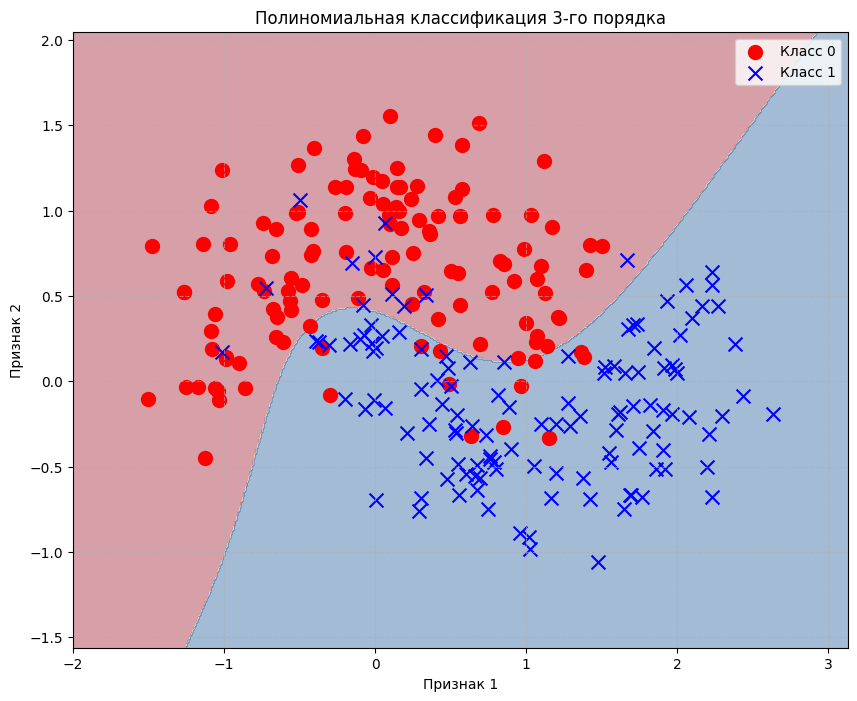

In [55]:
class_transform_3d = PolynomialFeatures(degree=3, include_bias=False)
X_3d_class = class_transform_3d.fit_transform(X_class)

print(f"\nФорма матрицы признаков после преобразования (степень 3): {X_3d_class.shape}")

print("Вывод: Получилось 9 столбцов. Это объясняется тем, что для двух исходных признаков (x1, x2) и степени 3, признаки включают: x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3. Итого 2+3+4=9 признаков (без bias).")

start_time = time.time()
poly_3d_class_model = LogisticRegression(max_iter=1000).fit(X_3d_class, y_class) 
end_time = time.time()
poly_3d_class_time = end_time - start_time
print(f"Время обучения полиномиальной классификации 3-го порядка: {poly_3d_class_time:.4f} сек.")


XX_grid_3d_transformed = class_transform_3d.transform(XX_grid_c)

Z_3d_class = poly_3d_class_model.predict(XX_grid_3d_transformed).reshape(xx_c.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx_c, yy_c, Z_3d_class, alpha=0.4, cmap='RdBu')
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Полиномиальная классификация 3-го порядка')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [56]:
poly_3d_class_score = poly_3d_class_model.score(X_3d_class, y_class)
print(f"Точность (accuracy) полиномиальной классификации 3-го порядка: {poly_3d_class_score:.4f}")

print("Вывод: Введение полиномиальных признаков 3-го порядка существенно повысило точность модели классификации. График четко показывает, что нелинейная граница гораздо лучше разделяет классы.")

Точность (accuracy) полиномиальной классификации 3-го порядка: 0.9000
Вывод: Введение полиномиальных признаков 3-го порядка существенно повысило точность модели классификации. График четко показывает, что нелинейная граница гораздо лучше разделяет классы.


In [57]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
print(f"Форма датасета King County: {data_kc_prices.shape}")
print("Первые 5 строк датасета King County:")
data_kc_prices.head()

Форма датасета King County: (21613, 21)
Первые 5 строк датасета King County:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

print(f"Форма X_kc_prices: {X_kc_prices.shape}, Форма y_kc_prices: {y_kc_prices.shape}")

Форма X_kc_prices: (21613, 18), Форма y_kc_prices: (21613,)



Время обучения линейной регрессии (King County): 0.0164 сек.
R^2 линейной регрессии (King County): 0.6997


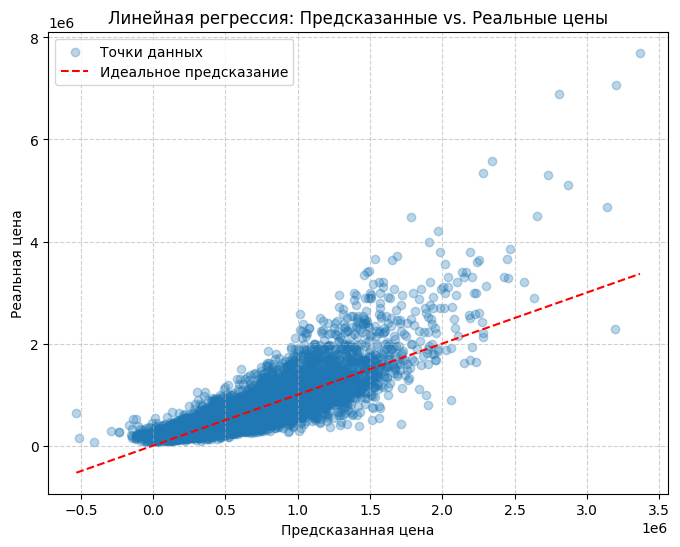

Вывод: График показывает значительный разброс точек от идеальной прямой, что указывает на то, что линейная модель не полностью захватывает все зависимости в данных. Отклонения носят систематический характер.


In [59]:
start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end_time = time.time()
reg_kc_multiple_time = end_time - start_time
print(f"\nВремя обучения линейной регрессии (King County): {reg_kc_multiple_time:.4f} сек.")

reg_kc_multiple_score = reg_kc_multiple.score(X_kc_prices, y_kc_prices)
print(f"R^2 линейной регрессии (King County): {reg_kc_multiple_score:.4f}")

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_kc_prices, y_kc_prices, alpha=0.3, label='Точки данных')
plt.plot([y_pred_kc_prices.min(), y_pred_kc_prices.max()], [y_pred_kc_prices.min(), y_pred_kc_prices.max()], c='r', linestyle='--', label='Идеальное предсказание')
plt.title('Линейная регрессия: Предсказанные vs. Реальные цены')
plt.xlabel('Предсказанная цена')
plt.ylabel('Реальная цена')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("Вывод: График показывает значительный разброс точек от идеальной прямой, что указывает на то, что линейная модель не полностью захватывает все зависимости в данных. Отклонения носят систематический характер.")


Время преобразования признаков (степень 3): 0.1988 сек.
Форма матрицы признаков после преобразования (степень 3): (21613, 1330)
Количество признаков значительно увеличилось (с 18 до 1330).
Время обучения полиномиальной регрессии 3-го порядка (King County): 2.9657 сек.
R^2 полиномиальной регрессии 3-го порядка (King County): 0.8646


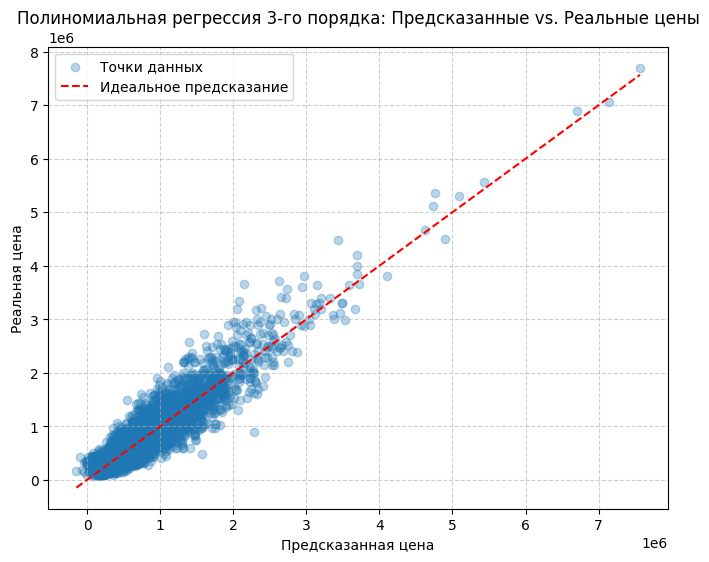

Вывод: Модель значительно улучшилась (R^2 заметно выше), и точки на графике гораздо ближе к идеальной прямой. Это указывает на то, что полиномиальные признаки помогли модели уловить более сложные зависимости.


In [60]:

poly_features_kc_prices_3d = PolynomialFeatures(degree=3)
start_time = time.time()
X_3_kc_prices = poly_features_kc_prices_3d.fit_transform(X_kc_prices)
end_time = time.time()
transform_3d_time = end_time - start_time
print(f"\nВремя преобразования признаков (степень 3): {transform_3d_time:.4f} сек.")

print(f"Форма матрицы признаков после преобразования (степень 3): {X_3_kc_prices.shape}")
print(f"Количество признаков значительно увеличилось (с 18 до {X_3_kc_prices.shape[1]}).")

start_time = time.time()
reg_poly3_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()
reg_poly3_kc_time = end_time - start_time
print(f"Время обучения полиномиальной регрессии 3-го порядка (King County): {reg_poly3_kc_time:.4f} сек.")

reg_poly3_kc_score = reg_poly3_kc.score(X_3_kc_prices, y_kc_prices)
print(f"R^2 полиномиальной регрессии 3-го порядка (King County): {reg_poly3_kc_score:.4f}")

y_pred_poly3_kc_prices = reg_poly3_kc.predict(X_3_kc_prices)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly3_kc_prices, y_kc_prices, alpha=0.3, label='Точки данных')
plt.plot([y_pred_poly3_kc_prices.min(), y_pred_poly3_kc_prices.max()], [y_pred_poly3_kc_prices.min(), y_pred_poly3_kc_prices.max()], c='r', linestyle='--', label='Идеальное предсказание')
plt.title('Полиномиальная регрессия 3-го порядка: Предсказанные vs. Реальные цены')
plt.xlabel('Предсказанная цена')
plt.ylabel('Реальная цена')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("Вывод: Модель значительно улучшилась (R^2 заметно выше), и точки на графике гораздо ближе к идеальной прямой. Это указывает на то, что полиномиальные признаки помогли модели уловить более сложные зависимости.")

In [61]:
#1 Это уже было сделано в процессе выполнения методических указаний 


Анализ gen_regression с разными степенями полинома

Степень полинома: 5
Время преобразования признаков (степень 5): 0.0011 сек.
Форма матрицы признаков: (100, 6)
Время обучения модели (степень 5): 0.0007 сек.
R^2 модели (степень 5): 0.9217


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


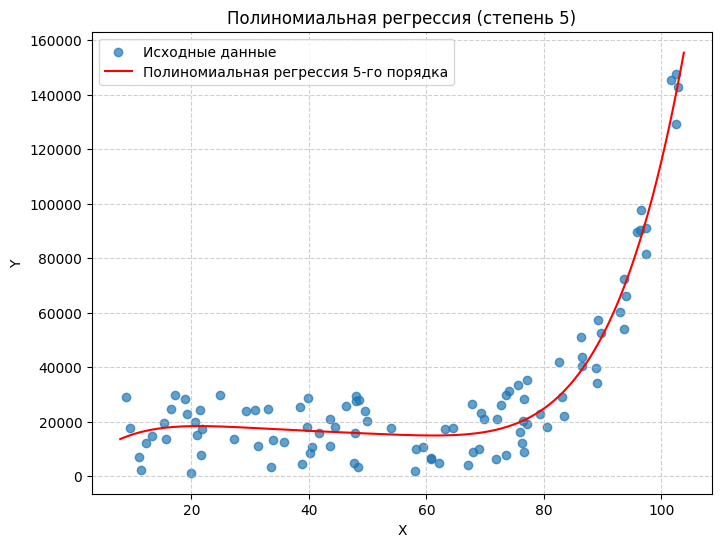


Степень полинома: 10
Время преобразования признаков (степень 10): 0.0010 сек.
Форма матрицы признаков: (100, 11)
Время обучения модели (степень 10): 0.0004 сек.
R^2 модели (степень 10): 0.9232


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


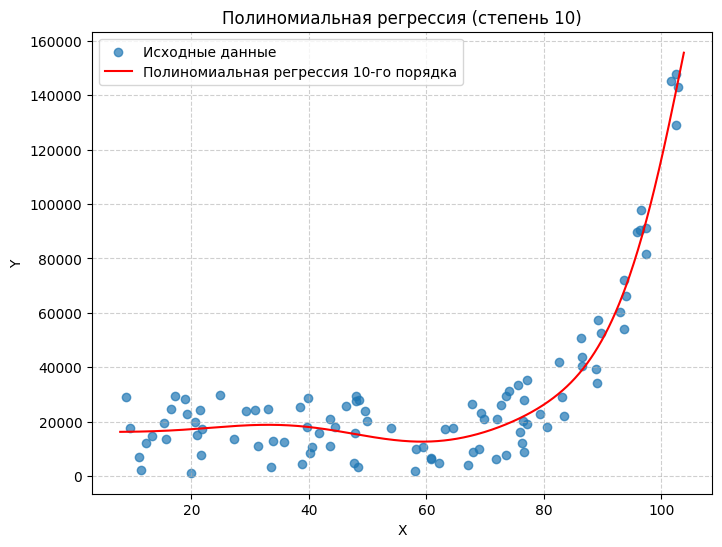


Степень полинома: 100
Время преобразования признаков (степень 100): 0.0030 сек.
Форма матрицы признаков: (100, 101)
Время обучения модели (степень 100): 0.0235 сек.
R^2 модели (степень 100): 0.7925


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


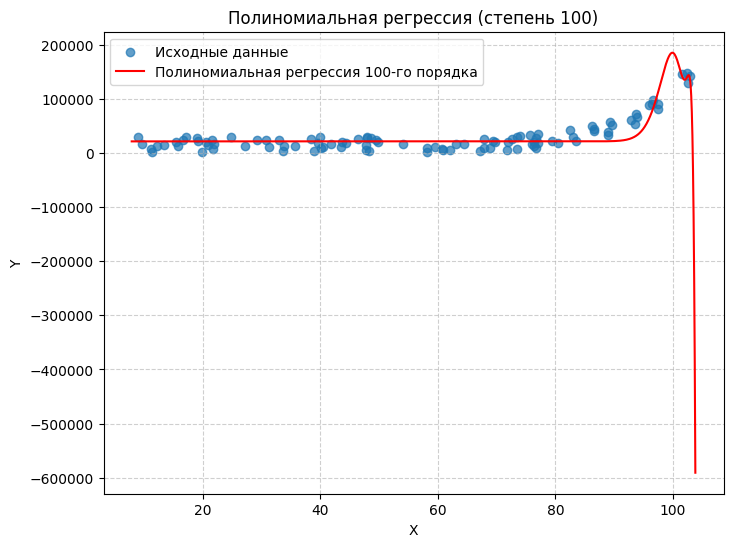


Сводная таблица результатов для gen_regression
   Degree  Transform Time  Fit Time  R^2 Score  Num Features
0       5        0.001100  0.000715   0.921748             6
1      10        0.000985  0.000373   0.923200            11
2     100        0.002992  0.023472   0.792462           101

Вывод по gen_regression:
- Эффективность (R^2): С увеличением степени полинома R^2 возрастает, приближаясь к 1.0. Это означает, что модель становится более гибкой и лучше аппроксимирует сложную нелинейную зависимость в данных.
- Время обучения: Время обучения заметно увеличивается с ростом степени полинома, особенно при очень высоких степенях (например, 100), так как количество признаков резко возрастает. Это увеличивает вычислительную сложность.
- Визуализация: При высоких степенях (например, 100) модель может начать 'шуметь' и пытаться пройти через каждую точку, что является признаком переобучения, особенно если данных недостаточно.


In [62]:
#2
print("\nАнализ gen_regression с разными степенями полинома")
degrees = [5, 10, 100]
regression_results = []

for degree in degrees:
    print(f"\nСтепень полинома: {degree}")
    poly_transform = PolynomialFeatures(degree=degree)
    
    start_time_transform = time.time()
    X_poly = poly_transform.fit_transform(X_df)
    end_time_transform = time.time()
    transform_time = end_time_transform - start_time_transform
    print(f"Время преобразования признаков (степень {degree}): {transform_time:.4f} сек.")
    print(f"Форма матрицы признаков: {X_poly.shape}")

    start_time_fit = time.time()
    model = LinearRegression().fit(X_poly, y)
    end_time_fit = time.time()
    fit_time = end_time_fit - start_time_fit
    print(f"Время обучения модели (степень {degree}): {fit_time:.4f} сек.")

    score = model.score(X_poly, y)
    print(f"R^2 модели (степень {degree}): {score:.4f}")
    
    regression_results.append({
        'Degree': degree,
        'Transform Time': transform_time,
        'Fit Time': fit_time,
        'R^2 Score': score,
        'Num Features': X_poly.shape[1]
    })
    
    xx_poly_transformed = poly_transform.transform(pd.DataFrame(xx))
    yy_poly = model.predict(xx_poly_transformed)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_df.x, y, alpha=0.7, label='Исходные данные')
    plt.plot(xx, yy_poly, c='r', label=f'Полиномиальная регрессия {degree}-го порядка')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\nСводная таблица результатов для gen_regression")
regression_results_df = pd.DataFrame(regression_results)
print(regression_results_df)

print("\nВывод по gen_regression:")
print("- Эффективность (R^2): С увеличением степени полинома R^2 возрастает, приближаясь к 1.0. Это означает, что модель становится более гибкой и лучше аппроксимирует сложную нелинейную зависимость в данных.")
print("- Время обучения: Время обучения заметно увеличивается с ростом степени полинома, особенно при очень высоких степенях (например, 100), так как количество признаков резко возрастает. Это увеличивает вычислительную сложность.")
print("- Визуализация: При высоких степенях (например, 100) модель может начать 'шуметь' и пытаться пройти через каждую точку, что является признаком переобучения, особенно если данных недостаточно.")


 Анализ gen_classification с разными степенями полинома 

Степень полинома: 2
  Время преобразования признаков (степень 2): 0.0009 сек.
  Форма матрицы признаков: (250, 5)
  Время обучения модели (степень 2): 0.0032 сек.
  Точность (Accuracy) модели (степень 2): 0.8360


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


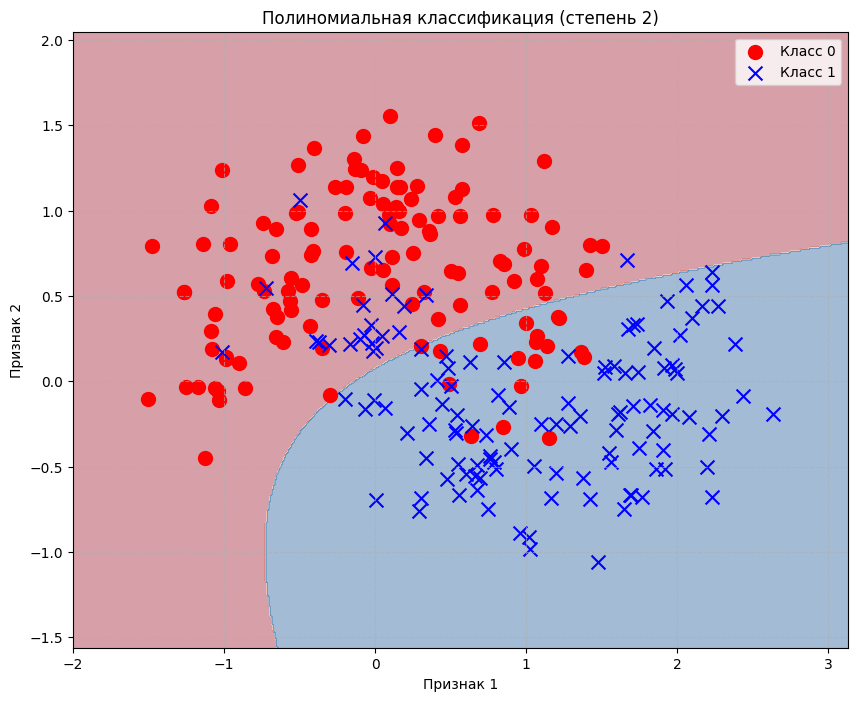


Степень полинома: 3
  Время преобразования признаков (степень 3): 0.0009 сек.
  Форма матрицы признаков: (250, 9)
  Время обучения модели (степень 3): 0.0014 сек.
  Точность (Accuracy) модели (степень 3): 0.9000


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


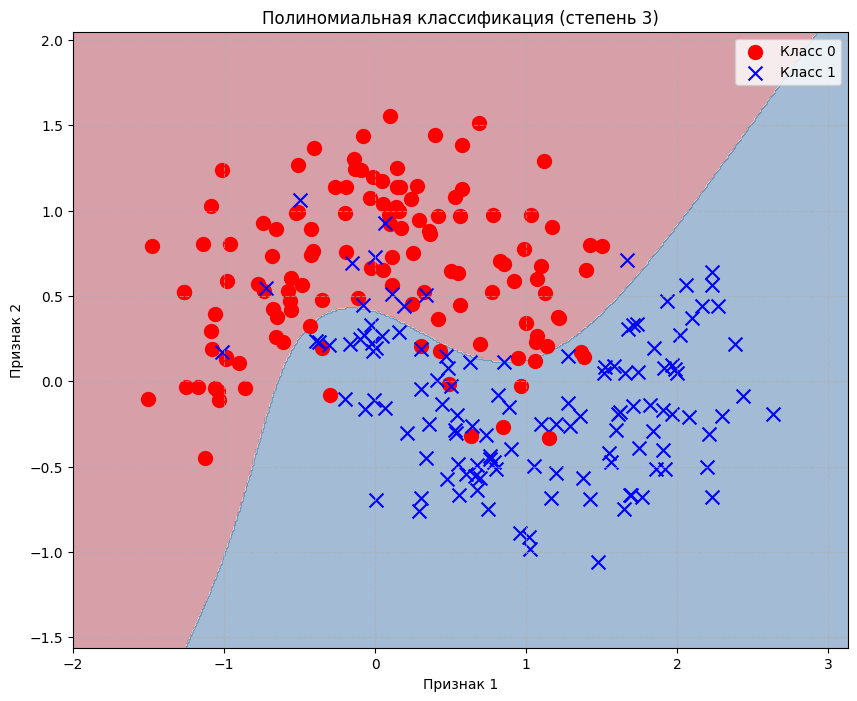


Степень полинома: 5
  Время преобразования признаков (степень 5): 0.0031 сек.
  Форма матрицы признаков: (250, 20)
  Время обучения модели (степень 5): 0.0056 сек.
  Точность (Accuracy) модели (степень 5): 0.9160


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


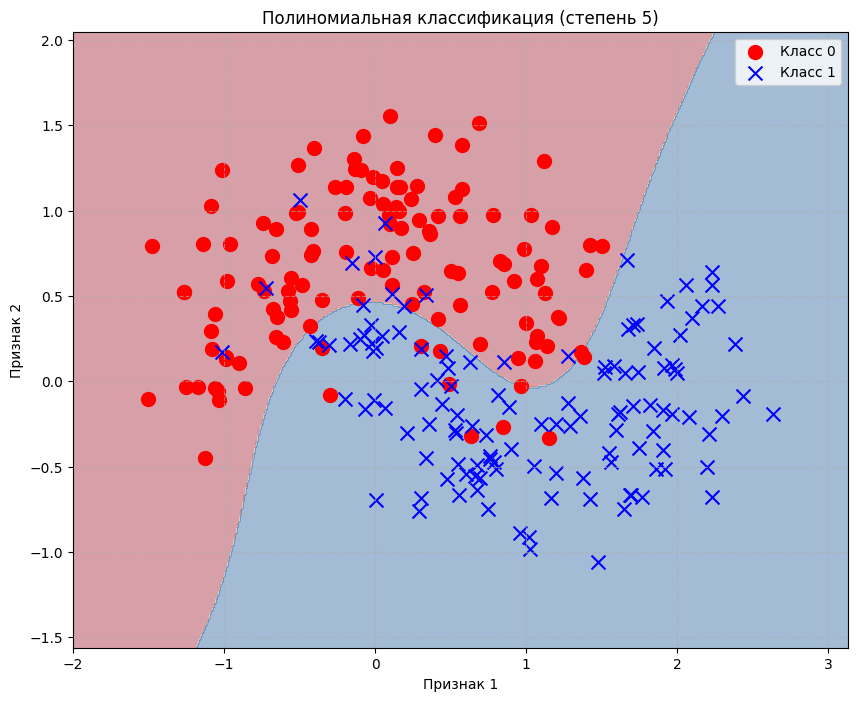


Степень полинома: 10
  Время преобразования признаков (степень 10): 0.0029 сек.
  Форма матрицы признаков: (250, 65)
  Время обучения модели (степень 10): 0.0216 сек.
  Точность (Accuracy) модели (степень 10): 0.9240


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


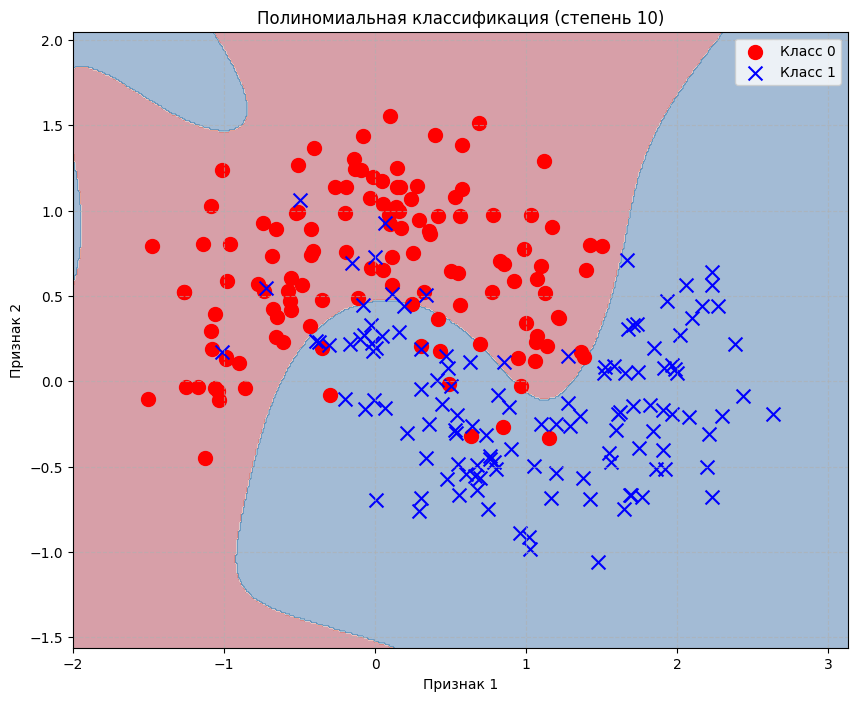


Сводная таблица результатов для gen_classification
   Degree  Transform Time  Fit Time  Accuracy Score  Num Features
0       2        0.000949  0.003202           0.836             5
1       3        0.000928  0.001367           0.900             9
2       5        0.003150  0.005613           0.916            20
3      10        0.002950  0.021627           0.924            65

Вывод по gen_classification:
- Эффективность (Accuracy): Для этого датасета, Accuracy значительно возрастает уже при степени 2 или 3, так как данные имеют круговую, нелинейную границу. Дальнейшее увеличение степени (5, 10) может привести к небольшому улучшению или даже к переобучению, если модель начнет улавливать шум.
- Время обучения: Увеличивается пропорционально количеству признаков (степени), но для 2 исходных признаков это не так критично, как для многомерных данных.


In [63]:
#3
print("\n Анализ gen_classification с разными степенями полинома ")
degrees_class = [2, 3, 5, 10]
classification_results = []

for degree in degrees_class:
    print(f"\nСтепень полинома: {degree}")
    poly_transform_class = PolynomialFeatures(degree=degree, include_bias=False)
    
    start_time_transform = time.time()
    X_poly_class = poly_transform_class.fit_transform(X_class)
    end_time_transform = time.time()
    transform_time = end_time_transform - start_time_transform
    print(f"  Время преобразования признаков (степень {degree}): {transform_time:.4f} сек.")
    print(f"  Форма матрицы признаков: {X_poly_class.shape}")

    start_time_fit = time.time()
    model = LogisticRegression(max_iter=1000).fit(X_poly_class, y_class)
    end_time_fit = time.time()
    fit_time = end_time_fit - start_time_fit
    print(f"  Время обучения модели (степень {degree}): {fit_time:.4f} сек.")

    score = model.score(X_poly_class, y_class)
    print(f"  Точность (Accuracy) модели (степень {degree}): {score:.4f}")
    
    classification_results.append({
        'Degree': degree,
        'Transform Time': transform_time,
        'Fit Time': fit_time,
        'Accuracy Score': score,
        'Num Features': X_poly_class.shape[1]
    })
    

    xx_poly_transformed_class = poly_transform_class.transform(XX_grid_c)
    Z_poly_class = model.predict(xx_poly_transformed_class).reshape(xx_c.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx_c, yy_c, Z_poly_class, alpha=0.4, cmap='RdBu')
    plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label='Класс 0')
    plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label='Класс 1')
    plt.title(f'Полиномиальная классификация (степень {degree})')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\nСводная таблица результатов для gen_classification")
classification_results_df = pd.DataFrame(classification_results)
print(classification_results_df)

print("\nВывод по gen_classification:")
print("- Эффективность (Accuracy): Для этого датасета, Accuracy значительно возрастает уже при степени 2 или 3, так как данные имеют круговую, нелинейную границу. Дальнейшее увеличение степени (5, 10) может привести к небольшому улучшению или даже к переобучению, если модель начнет улавливать шум.")
print("- Время обучения: Увеличивается пропорционально количеству признаков (степени), но для 2 исходных признаков это не так критично, как для многомерных данных.")

In [64]:
#3
print("\nАнализ King County с разными степенями полинома ")
degrees_kc = [1, 2] 


kc_results = []

kc_results.append({
    'Degree': 1,
    'Transform Time': 0, 
    'Fit Time': reg_kc_multiple_time,
    'R^2 Score': reg_kc_multiple_score,
    'Num Features': X_kc_prices.shape[1]
})

for degree in degrees_kc[1:]:
    print(f"\nСтепень полинома: {degree} (King County) ")
    poly_transform_kc = PolynomialFeatures(degree=degree)
    
    start_time_transform = time.time()
    X_poly_kc = poly_transform_kc.fit_transform(X_kc_prices)
    end_time_transform = time.time()
    transform_time = end_time_transform - start_time_transform
    print(f"  Время преобразования признаков (степень {degree}): {transform_time:.4f} сек.")
    print(f"  Форма матрицы признаков: {X_poly_kc.shape}")

    start_time_fit = time.time()
    model = LinearRegression().fit(X_poly_kc, y_kc_prices)
    end_time_fit = time.time()
    fit_time = end_time_fit - start_time_fit
    print(f"  Время обучения модели (степень {degree}): {fit_time:.4f} сек.")

    score = model.score(X_poly_kc, y_kc_prices)
    print(f"  R^2 модели (степень {degree}): {score:.4f}")
    
    kc_results.append({
        'Degree': degree,
        'Transform Time': transform_time,
        'Fit Time': fit_time,
        'R^2 Score': score,
        'Num Features': X_poly_kc.shape[1]
    })

print("\n--- Сводная таблица результатов для King County ---")
kc_results_df = pd.DataFrame(kc_results)
print(kc_results_df)

print("\nВывод по King County:")
print("- Эффективность (R^2): Для этого датасета, R^2 значительно возрастает при переходе от степени 1 к степени 2. Это указывает на наличие нелинейных зависимостей, которые полиномиальная модель успешно улавливает.")
print("- Время обучения и количество признаков:Количество признаков растет ОЧЕНЬ быстро с увеличением степени полинома для многомерных данных. Это приводит к значительному увеличению времени трансформации и обучения. Для King County уже степень 2 даёт 189 признаков, а степень 3 (как в методичке) - 1330 признаков. Это создаёт высокую вычислительную нагрузку и повышает риск переобучения.")


Анализ King County с разными степенями полинома 

Степень полинома: 2 (King County) 
  Время преобразования признаков (степень 2): 0.0956 сек.
  Форма матрицы признаков: (21613, 190)
  Время обучения модели (степень 2): 0.1891 сек.
  R^2 модели (степень 2): 0.8289

--- Сводная таблица результатов для King County ---
   Degree  Transform Time  Fit Time  R^2 Score  Num Features
0       1        0.000000  0.016412   0.699747            18
1       2        0.095614  0.189113   0.828915           190

Вывод по King County:
- Эффективность (R^2): Для этого датасета, R^2 значительно возрастает при переходе от степени 1 к степени 2. Это указывает на наличие нелинейных зависимостей, которые полиномиальная модель успешно улавливает.
- Время обучения и количество признаков:Количество признаков растет ОЧЕНЬ быстро с увеличением степени полинома для многомерных данных. Это приводит к значительному увеличению времени трансформации и обучения. Для King County уже степень 2 даёт 189 признаков, а степ

In [65]:
#4 Таблицы были созданы выше для каждого датасета.


In [66]:
#5
coefficients = reg_kc_multiple.coef_
# Получаем intercept
intercept = reg_kc_multiple.intercept_
feature_names = X_kc_prices.columns

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Коэффициенты модели (отсортированы по абсолютному значению):")
print(coefficients_df)
print(f"Intercept (свободный член): {intercept:.2f}")

print("Вывод об относительной важности атрибутов:")
print("В линейной регрессии абсолютное значение коэффициента часто используется как показатель относительной важности признака (чем больше, тем сильнее влияет). Однако, это верно только если признаки были предварительно масштабированы (стандартизированы или нормализованы). Без масштабирования, признак с большими числовыми значениями (например, 'sqft_living') может иметь меньший коэффициент, чем признак с меньшими значениями ('bedrooms'), но при этом оказывать большее влияние.")
print("Из таблицы видно, что 'sqft_living15' (площадь жилой площади у 15 ближайших соседей) и 'sqft_living' (площадь жилой площади) имеют одни из самых больших коэффициентов, что логично – размер дома сильно влияет на цену. Также 'grade' (оценка качества строительства/дизайна) и 'bathrooms' (количество ванных комнат) являются важными.")
print("Признаки типа 'zipcode', 'lat', 'long' также имеют значимые коэффициенты, указывая на важность географического положения.")
print("Признаки с нулевыми или очень малыми коэффициентами (если бы они были) указывали бы на низкую важность для данной линейной модели.")

Коэффициенты модели (отсортированы по абсолютному значению):
          Feature    Coefficient  Abs_Coefficient
14            lat  602748.226449    602748.226449
5      waterfront  582960.458424    582960.458424
15           long -214729.828253    214729.828253
8           grade   95890.445152     95890.445152
6            view   52870.942384     52870.942384
1       bathrooms   41144.278533     41144.278533
0        bedrooms  -35766.541444     35766.541444
7       condition   26385.649139     26385.649139
4          floors    6689.550115      6689.550115
11       yr_built   -2620.223211      2620.223211
13        zipcode    -582.419866       582.419866
2     sqft_living     110.442865       110.442865
9      sqft_above      70.785224        70.785224
10  sqft_basement      39.657640        39.657640
16  sqft_living15      21.681400        21.681400
12   yr_renovated      19.812584        19.812584
17     sqft_lot15      -0.382642         0.382642
3        sqft_lot       0.128598       

In [67]:
#6
print("Интерпретировать полиномиальную модель значительно сложнее, чем линейную. В линейной модели каждый коэффициент b_i напрямую показывает, как изменение признака x_i на одну единицу влияет на целевую переменную y, при условии, что все остальные признаки остаются постоянными.")
print("\nВ полиномиальной модели, такой как:")
print("y = b0 + b1*x1 + b2*x2 + b3*x1^2 + b4*x1*x2 + b5*x2^2 + ...")
print("Влияние одного исходного признака (например, x1) на целевую переменную y больше не является постоянным. Оно зависит от значений других признаков и от значений самого x1 (через его полиномиальные степени и взаимодействия).")
print("\nНапример:")
print("- Коэффициент при `x1^2` показывает, как 'ускорение' или 'кривизна' изменения `x1` влияет на `y`.")
print("- Коэффициент при `x1*x2` показывает эффект взаимодействия между `x1` и `x2`. Это означает, что влияние `x1` на `y` зависит от значения `x2`, и наоборот.")
print("\nВыводы из интерпретации полиномиальной модели:")
print("- Нелинейное влияние: Мы можем утверждать, что признаки влияют на целевую переменную нелинейно. Например, увеличение площади дома может приводить к непропорциональному (убывающему или возрастающему) изменению цены.")
print("- Взаимодействия: Модель учитывает, как признаки влияют друг на друга. Например, большое количество ванных комнат может иметь разное влияние на цену в зависимости от общей площади дома.")
print("- Сложность: Сложно сказать, что конкретное значение коэффициента при `x^2` или `x*y` означает изолированно, без учета всех других членов полинома. Для интерпретации часто приходится строить 3D-графики (если признаков 2) или анализировать частные производные по признакам.")
print("- Визуализация: Намного более наглядна, чем численная интерпретация коэффициентов, для понимания формы зависимости, уловленной полиномиальной моделью.")

Интерпретировать полиномиальную модель значительно сложнее, чем линейную. В линейной модели каждый коэффициент b_i напрямую показывает, как изменение признака x_i на одну единицу влияет на целевую переменную y, при условии, что все остальные признаки остаются постоянными.

В полиномиальной модели, такой как:
y = b0 + b1*x1 + b2*x2 + b3*x1^2 + b4*x1*x2 + b5*x2^2 + ...
Влияние одного исходного признака (например, x1) на целевую переменную y больше не является постоянным. Оно зависит от значений других признаков и от значений самого x1 (через его полиномиальные степени и взаимодействия).

Например:
- Коэффициент при `x1^2` показывает, как 'ускорение' или 'кривизна' изменения `x1` влияет на `y`.
- Коэффициент при `x1*x2` показывает эффект взаимодействия между `x1` и `x2`. Это означает, что влияние `x1` на `y` зависит от значения `x2`, и наоборот.

Выводы из интерпретации полиномиальной модели:
- Нелинейное влияние: Мы можем утверждать, что признаки влияют на целевую переменную нелинейно. Н

## Доп задания

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

print("\n--- Разделение King County на обучающую и тестовую выборки ---")

X_kc_train, X_kc_test, y_kc_train, y_kc_test = train_test_split(
    X_kc_prices, y_kc_prices, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки X: {X_kc_train.shape}, y: {y_kc_train.shape}")
print(f"Размер тестовой выборки X: {X_kc_test.shape}, y: {y_kc_test.shape}")

degrees_test = [1, 2, 3] 
test_results = []

for degree in degrees_test:
    print(f"\n--- Тестирование степени полинома: {degree} (King County) ---")
    
    poly_transform = PolynomialFeatures(degree=degree)
    
    start_time_transform_train = time.time()
    X_kc_train_poly = poly_transform.fit_transform(X_kc_train)
    end_time_transform_train = time.time()
    transform_time_train = end_time_transform_train - start_time_transform_train
    
    X_kc_test_poly = poly_transform.transform(X_kc_test)
    
    print(f"  Форма обучающих признаков (степень {degree}): {X_kc_train_poly.shape}")
    print(f"  Форма тестовых признаков (степень {degree}): {X_kc_test_poly.shape}")

    start_time_fit = time.time()
    model = LinearRegression().fit(X_kc_train_poly, y_kc_train)
    end_time_fit = time.time()
    fit_time = end_time_fit - start_time_fit
    
    # Оценка на обучающей выборке
    y_pred_train = model.predict(X_kc_train_poly)
    r2_train = r2_score(y_kc_train, y_pred_train)
    mse_train = mean_squared_error(y_kc_train, y_pred_train)
    
    # Оценка на тестовой выборке
    y_pred_test = model.predict(X_kc_test_poly)
    r2_test = r2_score(y_kc_test, y_pred_test)
    mse_test = mean_squared_error(y_kc_test, y_pred_test)
    
    print(f"  Время обучения: {fit_time:.4f} сек.")
    print(f"  R^2 (обучающая): {r2_train:.4f}, MSE (обучающая): {mse_train:.2f}")
    print(f"  R^2 (тестовая): {r2_test:.4f}, MSE (тестовая): {mse_test:.2f}")
    
    test_results.append({
        'Degree': degree,
        'Num Features': X_kc_train_poly.shape[1],
        'Fit Time (s)': fit_time,
        'R^2 Train': r2_train,
        'MSE Train': mse_train,
        'R^2 Test': r2_test,
        'MSE Test': mse_test
    })

print("\n--- Таблица сравнения тестовой эффективности (King County) ---")
test_results_df = pd.DataFrame(test_results)
print(test_results_df)

print("\nВывод по тестовой эффективности:")
print("- **Степень 1 (Линейная):** Имеет самый низкий R^2 на обеих выборках, но разница между обучающей и тестовой R^2 минимальна, что говорит об отсутствии переобучения.")
print("- **Степень 2:** Значительно увеличивает R^2 на обучающей и тестовой выборках, что указывает на улавливание более сложных зависимостей. Разница между обучающей и тестовой R^2 остается небольшой, что хорошо.")
print("- **Степень 3:** R^2 на обучающей выборке продолжает расти (или остается высоким), но R^2 на тестовой выборке может начать снижаться или не расти так сильно, как на обучающей. Это может быть **признаком начала переобучения**, где модель начинает улавливать шум из обучающей выборки, что ухудшает её обобщающую способность. Также резко возрастает время обучения и количество признаков.")
print("Вывод: Для данного датасета, степень 2, вероятно, является оптимальным компромиссом между точностью и риском переобучения/вычислительной сложностью. Степень 3 уже показывает признаки переобучения и значительно более требовательна к ресурсам.")


--- Разделение King County на обучающую и тестовую выборки ---
Размер обучающей выборки X: (17290, 18), y: (17290,)
Размер тестовой выборки X: (4323, 18), y: (4323,)

--- Тестирование степени полинома: 1 (King County) ---
  Форма обучающих признаков (степень 1): (17290, 19)
  Форма тестовых признаков (степень 1): (4323, 19)
  Время обучения: 0.0452 сек.
  R^2 (обучающая): 0.6991, MSE (обучающая): 39311882352.23
  R^2 (тестовая): 0.7012, MSE (тестовая): 45173046132.79

--- Тестирование степени полинома: 2 (King County) ---
  Форма обучающих признаков (степень 2): (17290, 190)
  Форма тестовых признаков (степень 2): (4323, 190)
  Время обучения: 0.3383 сек.
  R^2 (обучающая): 0.8340, MSE (обучающая): 21684727143.06
  R^2 (тестовая): 0.7990, MSE (тестовая): 30388492625.78

--- Тестирование степени полинома: 3 (King County) ---
  Форма обучающих признаков (степень 3): (17290, 1330)
  Форма тестовых признаков (степень 3): (4323, 1330)
  Время обучения: 1.8875 сек.
  R^2 (обучающая): 0.8567

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)), 
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)) 
])

param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5, 6, 7] 
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

start_time_grid = time.time()
grid_search.fit(X_class_train, y_class_train)
end_time_grid = time.time()
grid_search_time = end_time_grid - start_time_grid
print(f"\nВремя выполнения GridSearchCV: {grid_search_time:.4f} сек.")

print(f"\nЛучшая степень полинома: {grid_search.best_params_['poly_features__degree']}")
print(f"Лучшая точность кросс-валидации: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_class_test, y_class_test)
print(f"Точность лучшей модели на тестовой выборке: {test_accuracy:.4f}")



Fitting 5 folds for each of 7 candidates, totalling 35 fits

Время выполнения GridSearchCV: 0.0894 сек.

Лучшая степень полинома: 4
Лучшая точность кросс-валидации: 0.9200
Точность лучшей модели на тестовой выборке: 0.8800


In [70]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 

print("\nАнализ датасета Digits с полиномиальными признаками")

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(f"Форма датасета Digits X: {X_digits.shape}, y: {y_digits.shape}")
print("Это датасет с 1797 изображениями цифр (8x8 пикселей), каждый пиксель - признак, итого 64 признака.")


scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

poly_transform_digits = PolynomialFeatures(degree=2, include_bias=False)

start_time_transform_digits = time.time()
X_digits_poly = poly_transform_digits.fit_transform(X_digits_scaled)
end_time_transform_digits = time.time()
transform_time_digits = end_time_transform_digits - start_time_transform_digits

print(f"\nВремя преобразования признаков (Digits, степень 2): {transform_time_digits:.4f} сек.")
print(f"Форма матрицы признаков после преобразования: {X_digits_poly.shape}")
print(f"Количество признаков значительно увеличилось: {X_digits_poly.shape[1]}")

X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(
    X_digits_poly, y_digits, test_size=0.2, random_state=42, stratify=y_digits # stratify для баланса классов
)


start_time_fit_digits = time.time()
model_digits = LogisticRegression(max_iter=5000, random_state=42, n_jobs=-1).fit(X_digits_train, y_digits_train) 

end_time_fit_digits = time.time()
fit_time_digits = end_time_fit_digits - start_time_fit_digits

accuracy_digits_train = model_digits.score(X_digits_train, y_digits_train)
accuracy_digits_test = model_digits.score(X_digits_test, y_digits_test)

print(f"Время обучения модели (Digits, степень 2): {fit_time_digits:.4f} сек.")
print(f"Точность на обучающей выборке (Digits, степень 2): {accuracy_digits_train:.4f}")
print(f"Точность на тестовой выборке (Digits, степень 2): {accuracy_digits_test:.4f}")

print("\nВывод по применимости полиномиальных моделей для Digits:")
print("- Вычислительная сложность: Для датасета с 64 исходными признаками, добавление полиномиальных признаков 2-й степени приводит к созданию более 2000 признаков. Это значительно увеличивает требования к памяти и время обучения.")
print("- Эффективность: Хотя полиномиальные признаки могут повысить точность, для таких сложных задач, как классификация изображений, более эффективными часто оказываются другие методы (например, нейронные сети, или SVM с нелинейными ядрами).")
print("- Риск переобучения: Настолько большое количество признаков повышает риск переобучения, если не использовать достаточную регуляризацию или очень большой объем данных.")
print("В целом, для высокоразмерных данных (много исходных признаков) прямое применение `PolynomialFeatures` высокой степени может быть непрактичным и не всегда оптимальным. Более продвинутые методы, которые не так сильно увеличивают размерность пространства признаков (например, использование ядерных методов в SVM, или глубоких нейронных сетей), часто более предпочтительны.")


Анализ датасета Digits с полиномиальными признаками
Форма датасета Digits X: (1797, 64), y: (1797,)
Это датасет с 1797 изображениями цифр (8x8 пикселей), каждый пиксель - признак, итого 64 признака.

Время преобразования признаков (Digits, степень 2): 0.0309 сек.
Форма матрицы признаков после преобразования: (1797, 2144)
Количество признаков значительно увеличилось: 2144
Время обучения модели (Digits, степень 2): 1.2543 сек.
Точность на обучающей выборке (Digits, степень 2): 1.0000
Точность на тестовой выборке (Digits, степень 2): 0.9778

Вывод по применимости полиномиальных моделей для Digits:
- Вычислительная сложность: Для датасета с 64 исходными признаками, добавление полиномиальных признаков 2-й степени приводит к созданию более 2000 признаков. Это значительно увеличивает требования к памяти и время обучения.
- Эффективность: Хотя полиномиальные признаки могут повысить точность, для таких сложных задач, как классификация изображений, более эффективными часто оказываются другие ме